In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import _rebuild
_rebuild()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# load data
data = pd.read_csv('./data/com(all).csv')
data.head()

,bianh,com_name,com_addr,cat,se_cat,com_des,born_data,death_data,live_days,financing,...,death_reason,invest_name,ceo_name,ceo_des,ceo_per_des,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,麦子金服,上海,金融,借贷,麦子金服是一家移动互联网金融服务集团，为个人和企业提供包括财富管理、股权投资、投融资咨询等综...,2015-03-01,2019-11-25,1730,B轮,...,政策监管 法律法规风险,海通开元&中缔资本,黄大容,董事长,黄大容，80后，经济学硕士，精通中英德三国语言。连续创业者，23岁创立第一家公司，25岁涉足...,NaN,NaN,NaN,NaN,NaN
1,1,拓道金服,浙江,金融,借贷,拓道金服是一家专注于汽车抵押贷款这一细分市场的P2P互联网金融公司。拓道金服通过互联网民间的...,2013-11-01,2019-11-24,2214,A轮,...,政策监管 法律法规风险,蓝山中国资本&帮实资本&宏桥资本,张罗军,创始人,杭州拓道科技有限公司执行董事兼总经理，重庆邮电学院计算机专业，创立杭州仁润科技有限公司，具有...,NaN,NaN,NaN,NaN,NaN
2,1,云柏科技,广东,医疗健康,医疗器械及硬件,云柏科技是一家智能健康检测腕表研发商，专注于智能可穿戴设备领域。主要产品包括可穿戴式多功能云...,2014-09-01,2019-11-01,1887,尚未获投,...,行业竞争,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,迷你生鲜,福建,电子商务,生鲜食品,迷你生鲜是一家会员制水果生鲜电商网站，平台产品由基地直供，采购深入全国及东南亚各地区，减少中...,2017-11-01,2019-10-29,727,尚未获投,...,现金流断裂 行业竞争,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,一生健康,北京,医疗健康,寻医诊疗,微爱康一款基于移动互联网的癌症患者互助型垂直社区产品，通过在线社会化问答和类轻博客交流模式，...,2015-01-01,2019-10-17,1750,尚未获投,...,政策监管 法律法规风险,NaN,张耀斌,CEO,张耀斌，为一生（北京）健康科技有限公司的创始人。,NaN,NaN,NaN,NaN,NaN


In [3]:
data.keys()

Index(['bianh', 'com_name', 'com_addr', 'cat', 'se_cat', 'com_des',
       'born_data', 'death_data', 'live_days', 'financing', 'total_money',
       'death_reason', 'invest_name', 'ceo_name', 'ceo_des', 'ceo_per_des',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 21 columns):
bianh           6272 non-null int64
com_name        6272 non-null object
com_addr        6272 non-null object
cat             6272 non-null object
se_cat          6271 non-null object
com_des         6271 non-null object
born_data       6272 non-null object
death_data      6272 non-null object
live_days       6272 non-null int64
financing       6272 non-null object
total_money     805 non-null float64
death_reason    1419 non-null object
invest_name     600 non-null object
ceo_name        4839 non-null object
ceo_des         4838 non-null object
ceo_per_des     4839 non-null object
Unnamed: 16     0 non-null float64
Unnamed: 17     0 non-null float64
Unnamed: 18     0 non-null float64
Unnamed: 19     0 non-null float64
Unnamed: 20     0 non-null float64
dtypes: float64(6), int64(2), object(13)
memory usage: 1.0+ MB


In [5]:
print(data.columns[-5:])
data.drop(data.columns[-5:], axis=1, inplace=True)
data.drop('bianh', axis=1, inplace=True)

Index(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')


In [6]:
print(data.shape)
data.head()

(6272, 15)


,com_name,com_addr,cat,se_cat,com_des,born_data,death_data,live_days,financing,total_money,death_reason,invest_name,ceo_name,ceo_des,ceo_per_des
0,麦子金服,上海,金融,借贷,麦子金服是一家移动互联网金融服务集团，为个人和企业提供包括财富管理、股权投资、投融资咨询等综...,2015-03-01,2019-11-25,1730,B轮,90000.0,政策监管 法律法规风险,海通开元&中缔资本,黄大容,董事长,黄大容，80后，经济学硕士，精通中英德三国语言。连续创业者，23岁创立第一家公司，25岁涉足...
1,拓道金服,浙江,金融,借贷,拓道金服是一家专注于汽车抵押贷款这一细分市场的P2P互联网金融公司。拓道金服通过互联网民间的...,2013-11-01,2019-11-24,2214,A轮,8000.0,政策监管 法律法规风险,蓝山中国资本&帮实资本&宏桥资本,张罗军,创始人,杭州拓道科技有限公司执行董事兼总经理，重庆邮电学院计算机专业，创立杭州仁润科技有限公司，具有...
2,云柏科技,广东,医疗健康,医疗器械及硬件,云柏科技是一家智能健康检测腕表研发商，专注于智能可穿戴设备领域。主要产品包括可穿戴式多功能云...,2014-09-01,2019-11-01,1887,尚未获投,NaN,行业竞争,NaN,NaN,NaN,NaN
3,迷你生鲜,福建,电子商务,生鲜食品,迷你生鲜是一家会员制水果生鲜电商网站，平台产品由基地直供，采购深入全国及东南亚各地区，减少中...,2017-11-01,2019-10-29,727,尚未获投,NaN,现金流断裂 行业竞争,NaN,NaN,NaN,NaN
4,一生健康,北京,医疗健康,寻医诊疗,微爱康一款基于移动互联网的癌症患者互助型垂直社区产品，通过在线社会化问答和类轻博客交流模式，...,2015-01-01,2019-10-17,1750,尚未获投,NaN,政策监管 法律法规风险,NaN,张耀斌,CEO,张耀斌，为一生（北京）健康科技有限公司的创始人。


In [7]:
data.describe()

,live_days,total_money
count,6272.000000,8.050000e+02
mean,1304.558036,1.304852e+04
std,646.994339,1.949225e+05
min,-4616.000000,0.000000e+00
25%,855.000000,3.000000e+02
50%,1121.000000,6.500000e+02
75%,1674.000000,3.300000e+03
max,8622.000000,5.510000e+06


In [8]:
lives = data[data['live_days'] > 0]
lives.head()

,com_name,com_addr,cat,se_cat,com_des,born_data,death_data,live_days,financing,total_money,death_reason,invest_name,ceo_name,ceo_des,ceo_per_des
0,麦子金服,上海,金融,借贷,麦子金服是一家移动互联网金融服务集团，为个人和企业提供包括财富管理、股权投资、投融资咨询等综...,2015-03-01,2019-11-25,1730,B轮,90000.0,政策监管 法律法规风险,海通开元&中缔资本,黄大容,董事长,黄大容，80后，经济学硕士，精通中英德三国语言。连续创业者，23岁创立第一家公司，25岁涉足...
1,拓道金服,浙江,金融,借贷,拓道金服是一家专注于汽车抵押贷款这一细分市场的P2P互联网金融公司。拓道金服通过互联网民间的...,2013-11-01,2019-11-24,2214,A轮,8000.0,政策监管 法律法规风险,蓝山中国资本&帮实资本&宏桥资本,张罗军,创始人,杭州拓道科技有限公司执行董事兼总经理，重庆邮电学院计算机专业，创立杭州仁润科技有限公司，具有...
2,云柏科技,广东,医疗健康,医疗器械及硬件,云柏科技是一家智能健康检测腕表研发商，专注于智能可穿戴设备领域。主要产品包括可穿戴式多功能云...,2014-09-01,2019-11-01,1887,尚未获投,NaN,行业竞争,NaN,NaN,NaN,NaN
3,迷你生鲜,福建,电子商务,生鲜食品,迷你生鲜是一家会员制水果生鲜电商网站，平台产品由基地直供，采购深入全国及东南亚各地区，减少中...,2017-11-01,2019-10-29,727,尚未获投,NaN,现金流断裂 行业竞争,NaN,NaN,NaN,NaN
4,一生健康,北京,医疗健康,寻医诊疗,微爱康一款基于移动互联网的癌症患者互助型垂直社区产品，通过在线社会化问答和类轻博客交流模式，...,2015-01-01,2019-10-17,1750,尚未获投,NaN,政策监管 法律法规风险,NaN,张耀斌,CEO,张耀斌，为一生（北京）健康科技有限公司的创始人。


In [9]:
lives.describe()

,live_days,total_money
count,6271.000000,8.050000e+02
mean,1305.502153,1.304852e+04
std,642.710630,1.949225e+05
min,121.000000,0.000000e+00
25%,855.000000,3.000000e+02
50%,1121.000000,6.500000e+02
75%,1674.000000,3.300000e+03
max,8622.000000,5.510000e+06


In [10]:
lives.columns

Index(['com_name', 'com_addr', 'cat', 'se_cat', 'com_des', 'born_data',
       'death_data', 'live_days', 'financing', 'total_money', 'death_reason',
       'invest_name', 'ceo_name', 'ceo_des', 'ceo_per_des'],
      dtype='object')

In [11]:
lives.shape

(6271, 15)

In [12]:
lives.isnull().sum()

com_name           0
com_addr           0
cat                0
se_cat             1
com_des            1
born_data          0
death_data         0
live_days          0
financing          0
total_money     5466
death_reason    4852
invest_name     5671
ceo_name        1433
ceo_des         1434
ceo_per_des     1433
dtype: int64

In [13]:
lives['death_reason'].drop_duplicates()

0                政策监管 法律法规风险
2                       行业竞争
3                 现金流断裂 行业竞争
5                商业模式匮乏 行业竞争
6                      现金流断裂
                ...         
4459          融资能力不足 定价/成本问题
5466          定价/成本问题 法律法规风险
5764              市场伪需求 营销不足
6165    团队能力不足 产品缺陷严重 法律法规风险
6254            业务调整 定价/成本问题
Name: death_reason, Length: 150, dtype: object

In [14]:
lives['death_reason'].fillna('无', inplace=True)
lives.isnull().sum()

D:\anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


com_name           0
com_addr           0
cat                0
se_cat             1
com_des            1
born_data          0
death_data         0
live_days          0
financing          0
total_money     5466
death_reason       0
invest_name     5671
ceo_name        1433
ceo_des         1434
ceo_per_des     1433
dtype: int64

In [15]:
lives['death_year'] = pd.to_datetime(lives['death_data']).dt.year
lives['death_month'] = pd.to_datetime(lives['death_data']).dt.month
lives.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,com_name,com_addr,cat,se_cat,com_des,born_data,death_data,live_days,financing,total_money,death_reason,invest_name,ceo_name,ceo_des,ceo_per_des,death_year,death_month
0,麦子金服,上海,金融,借贷,麦子金服是一家移动互联网金融服务集团，为个人和企业提供包括财富管理、股权投资、投融资咨询等综...,2015-03-01,2019-11-25,1730,B轮,90000.0,政策监管 法律法规风险,海通开元&中缔资本,黄大容,董事长,黄大容，80后，经济学硕士，精通中英德三国语言。连续创业者，23岁创立第一家公司，25岁涉足...,2019,11
1,拓道金服,浙江,金融,借贷,拓道金服是一家专注于汽车抵押贷款这一细分市场的P2P互联网金融公司。拓道金服通过互联网民间的...,2013-11-01,2019-11-24,2214,A轮,8000.0,政策监管 法律法规风险,蓝山中国资本&帮实资本&宏桥资本,张罗军,创始人,杭州拓道科技有限公司执行董事兼总经理，重庆邮电学院计算机专业，创立杭州仁润科技有限公司，具有...,2019,11
2,云柏科技,广东,医疗健康,医疗器械及硬件,云柏科技是一家智能健康检测腕表研发商，专注于智能可穿戴设备领域。主要产品包括可穿戴式多功能云...,2014-09-01,2019-11-01,1887,尚未获投,NaN,行业竞争,NaN,NaN,NaN,NaN,2019,11
3,迷你生鲜,福建,电子商务,生鲜食品,迷你生鲜是一家会员制水果生鲜电商网站，平台产品由基地直供，采购深入全国及东南亚各地区，减少中...,2017-11-01,2019-10-29,727,尚未获投,NaN,现金流断裂 行业竞争,NaN,NaN,NaN,NaN,2019,10
4,一生健康,北京,医疗健康,寻医诊疗,微爱康一款基于移动互联网的癌症患者互助型垂直社区产品，通过在线社会化问答和类轻博客交流模式，...,2015-01-01,2019-10-17,1750,尚未获投,NaN,政策监管 法律法规风险,NaN,张耀斌,CEO,张耀斌，为一生（北京）健康科技有限公司的创始人。,2019,10


In [16]:
lives['death_year'].drop_duplicates()

0       2019
327     2018
785     2017
2930    2016
4388    2015
5519    2014
5854    2013
6036    2012
6106    2011
6163    2010
6203    2009
6228    2008
6240    2007
6252    2006
6262    2005
6264    2004
6265    2003
6270    1990
6271    1985
Name: death_year, dtype: int64

In [17]:
lives['death_month'].drop_duplicates()

0      11
3      10
7       9
9       8
15      7
18      6
283     5
289     4
300     3
310     2
312     1
327    12
Name: death_month, dtype: int64

In [18]:
lives.groupby('death_year').death_year.count().sort_values(ascending=False)

death_year
2017    2145
2016    1458
2015    1131
2018     458
2014     335
2019     327
2013     182
2012      70
2011      57
2010      40
2009      25
2008      12
2007      12
2006      10
2003       4
2005       2
2004       1
1990       1
1985       1
Name: death_year, dtype: int64

In [19]:
lives.groupby('death_month').death_month.count().sort_values(ascending=False)

death_month
8     1969
7     1874
12    1729
6      315
1      101
3       47
11      46
10      44
5       44
4       42
9       35
2       25
Name: death_month, dtype: int64

In [20]:
lives.groupby('com_addr').com_addr.count().sort_values(ascending=False)

com_addr
北京     2238
广东     1095
上海     1033
浙江      395
四川      282
江苏      253
福建      140
湖北      117
山东       83
陕西       79
重庆       72
河南       54
湖南       52
安徽       51
天津       45
辽宁       42
台湾       36
北美洲      23
香港       21
广西       20
河北       19
云南       18
黑龙江      17
贵州       14
江西       13
海南       10
亚洲       10
山西        9
吉林        7
内蒙古       6
甘肃        4
新疆        3
宁夏        3
欧洲        3
西藏        2
北京        1
青海        1
Name: com_addr, dtype: int64

In [21]:
death_year = lives.groupby('death_year').death_year.count().sort_values(ascending=True).reset_index(name='num')
death_year.head()

,death_year,num
0,1985,1
1,1990,1
2,2004,1
3,2005,2
4,2003,4


C:\Users\gg\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


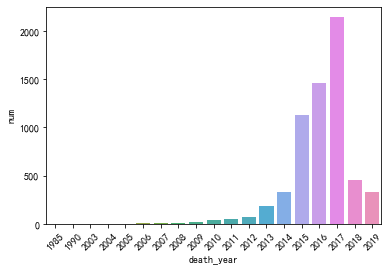

In [22]:
# plt.bar(death_year.death_year, death_year.num)
sns.barplot(death_year.death_year, death_year.num)
plt.xticks(rotation=45)
plt.show()

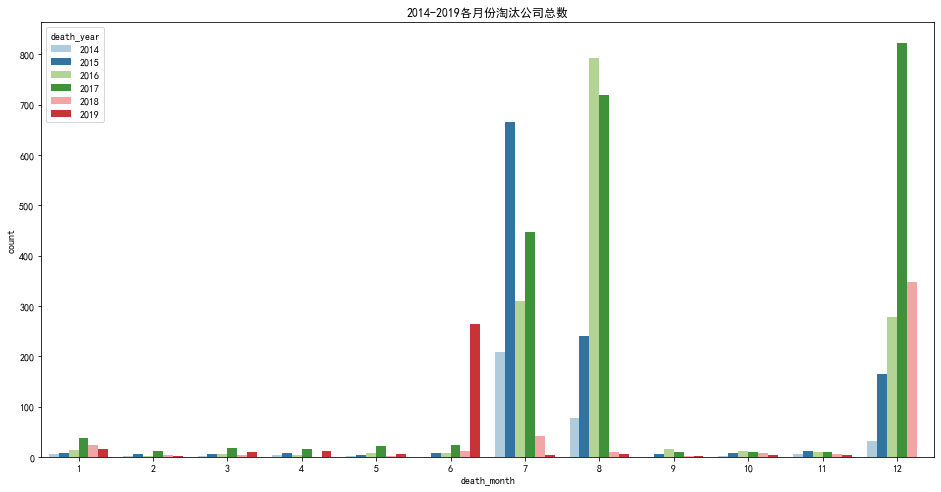

In [23]:
part = lives[lives['death_year'].isin(['2014', '2015','2016','2017','2018','2019'])]
plt.figure(figsize=(16, 8))
sns.countplot(x='death_month', hue='death_year', data=part, palette='Paired')
plt.title('2014-2019各月份淘汰公司总数')
plt.show()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gg\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gg\AppData\Roam

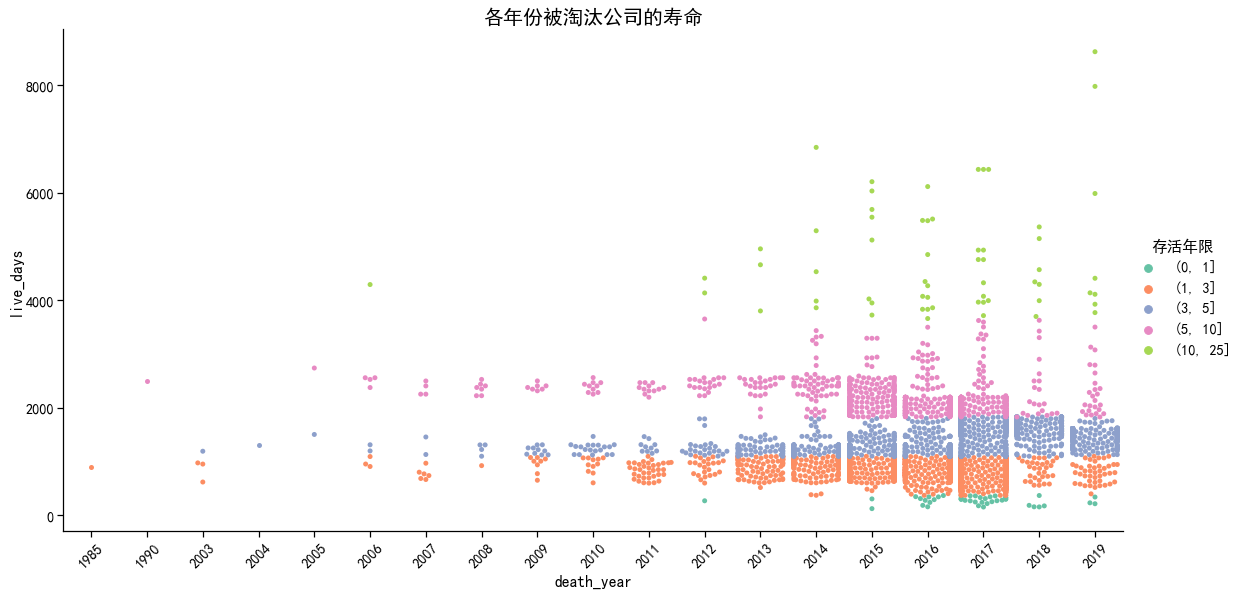

In [24]:
lives['live_years']=lives['live_days']/365
lives['存活年限'] = pd.cut(x=lives['live_years'],bins=[0,1,3,5,10,25])

sns.set_context("notebook", font_scale=1.3)
sns.catplot(x='death_year',y='live_days',hue='存活年限',kind='swarm',data=lives,height=8,aspect=2,palette='Set2')
plt.title('各年份被淘汰公司的寿命',fontsize=20)

plt.xticks(rotation=45)
plt.show()

In [27]:
reason_index = data['death_reason'].value_counts()[1:11].index
reason_index

Index(['行业竞争', '市场伪需求', '业务调整', '市场伪需求 商业模式匮乏', '产品入场时机 行业竞争', '商业模式匮乏 行业竞争',
       '融资能力不足', '政策监管 法律法规风险', '政策监管', '定价/成本问题'],
      dtype='object')

In [28]:
 data['death_reason'].value_counts()[1:11]

行业竞争            144
市场伪需求           115
业务调整             94
市场伪需求 商业模式匮乏     59
产品入场时机 行业竞争      46
商业模式匮乏 行业竞争      40
融资能力不足           39
政策监管 法律法规风险      39
政策监管             31
定价/成本问题          28
Name: death_reason, dtype: int64

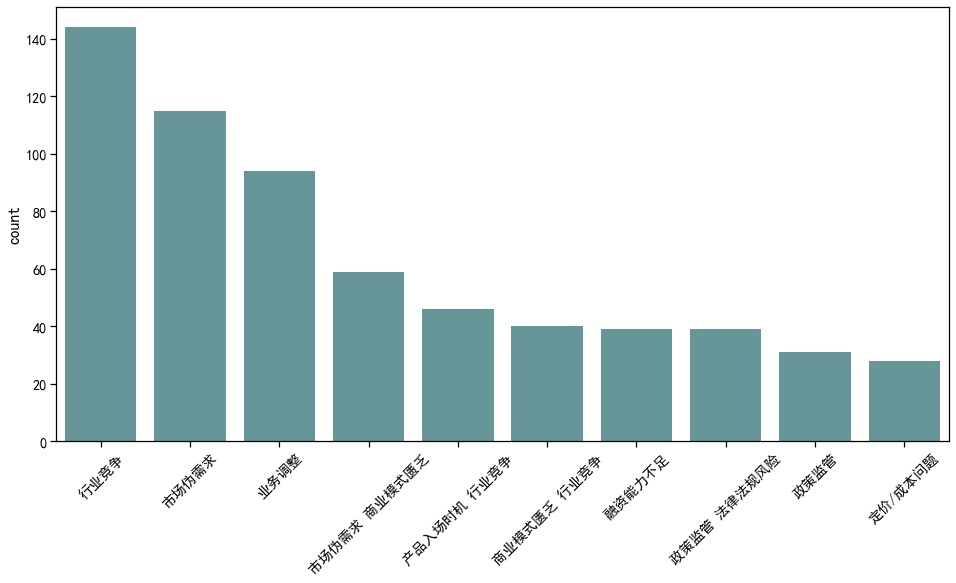

In [32]:
reason = data.loc[data['death_reason'].isin(reason_index), 'death_reason']
plt.figure(1, figsize=(16, 8))
sns.countplot(x=reason.values, order=reason_index, color='CadetBlue')
plt.xticks(rotation=45)
plt.show()

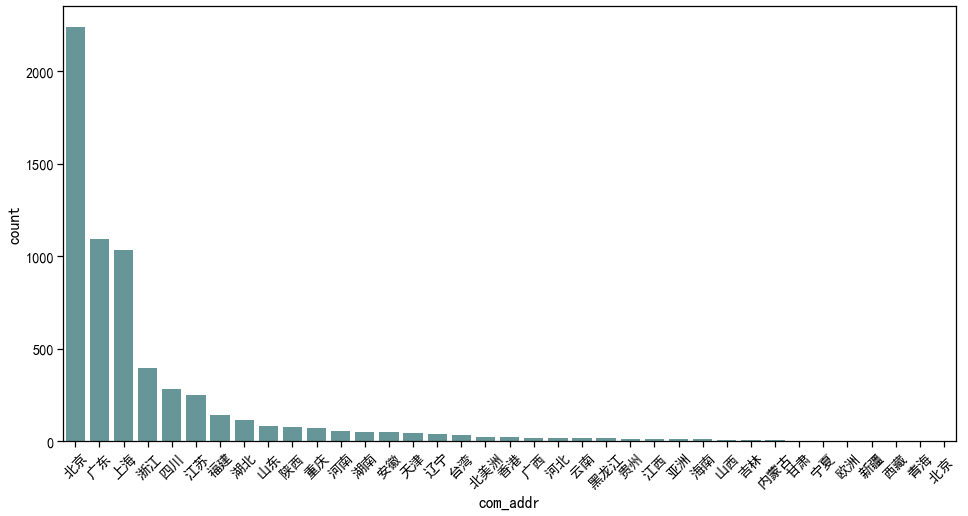

In [33]:
plt.figure(1, figsize=(16, 8))
sns.countplot(x='com_addr', order=data['com_addr'].value_counts().index, data=data, color='CadetBlue')
plt.xticks(rotation=45)
plt.show()

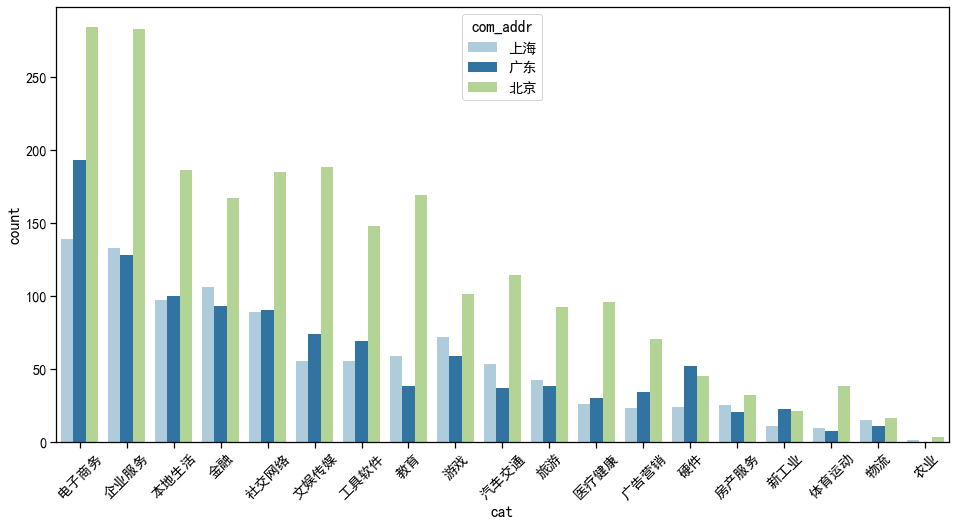

In [35]:
df2 = data[data['com_addr'].isin(['北京', '广东', '上海'])]
plt.figure(1, figsize=(16, 8))
sns.countplot(x='cat', order=df2['cat'].value_counts().index, hue='com_addr', data=df2, palette='Paired')
plt.xticks(rotation=45)
plt.show()

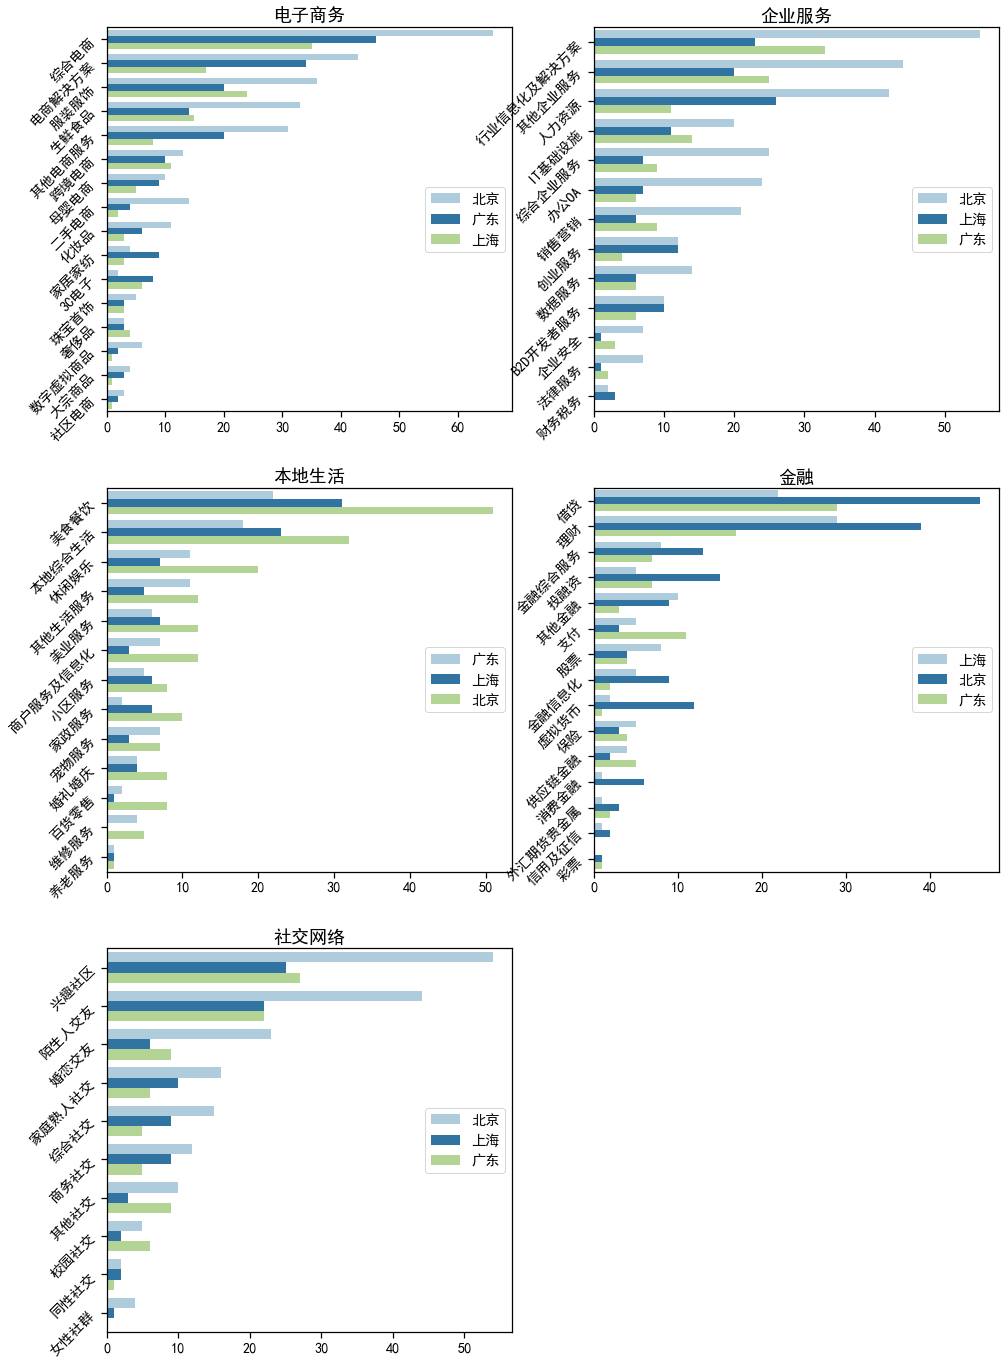

In [38]:
plt.figure(1, figsize=(16, 24))
n = 0
for x in ['电子商务','企业服务','本地生活','金融','社交网络']:
    n = n + 1
    plt.subplot(3, 2, n)
    sns.countplot(y='se_cat',hue='com_addr',order=df2[df2['cat'].isin([x])]['se_cat'].value_counts().index,data=df2[df2['cat'].isin([x])],palette='Paired')
    plt.title(x, fontsize=18)
    plt.yticks(rotation=45)
    plt.legend(loc=7)
    plt.xlabel('')
    plt.ylabel('')
    pass
plt.show()